In [1]:
%matplotlib inline
import cupy as cp
import cudf
import pickle
import pandas as pd
import seaborn as sns
from itertools import product
import matplotlib.pyplot as plt
from utils import visualize_data, visualize_data_cuml, visualize_data_spark_adjusted
sns.set_palette("muted")

# Visualize Data From cuML + Dask

### Visualize Strong Scaling in cuML + Dask based on the number of GPUs.

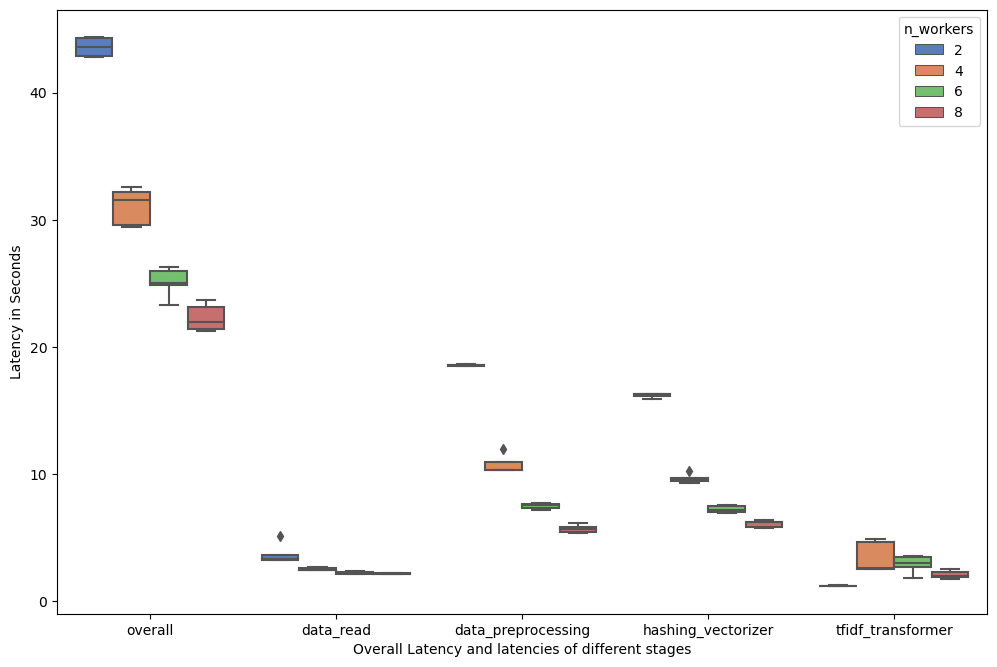

Unnamed: 0                    overall                 data_read  \
                mean       std count       mean       std count      mean   
n_workers                                                                   
2                  2  1.581139     5  43.601849  0.733715     5  3.676809   
4                  7  1.581139     5  31.045885  1.455146     5  2.499536   
6                 12  1.581139     5  25.068612  1.169822     5  2.190867   
8                 17  1.581139     5  22.267771  1.096895     5  2.142816   

                          hashing_vectorizer  ... tfidf_transformer  \
                std count               mean  ...             count   
n_workers                                     ...                     
2          0.804110     5          16.154609  ...                 5   
4          0.111701     5           9.627595  ...                 5   
6          0.093679     5           7.196249  ...                 5   
8          0.053349     5           6.060744  ...                 5   

          data_preprocessing                     nrows            sample_run  \
                        mean       std count      mean  std count       mean   
n_workers                                                                      
2                  18.526173  0.046918     5  20725971  0.0     5          2   
4                  10.764249  0.710378     5  20725971  0.0     5          2   
6                   7.466962  0.227338     5  20725971  0.0     5          2   
8                   5.670149  0.347658     5  20725971  0.0     5          2   

                           
                std count  
n_workers                  
2          1.581139     5  
4          1.581139     5  
6          1.581139     5  
8          1.581139     5  

[4 rows x 24 columns]

In [2]:
data_cuML, melt_data_cuML = visualize_data_cuml("./results/result_poc_nlp_dask_Books_persist.csv")
groupy_cuML = data_cuML.groupby("n_workers").agg(['mean', 'std', 'count'])
groupy_cuML

In [3]:
data_cuML

,Unnamed: 0,overall,data_read,hashing_vectorizer,tfidf_transformer,data_preprocessing,nrows,n_workers,sample_run
0,0,44.365918,5.089514,16.293625,1.153945,18.540179,20725971,2,0
1,1,42.820689,3.181780,16.099082,1.194649,18.522295,20725971,2,1
2,2,43.618034,3.577633,16.244208,1.166985,18.595844,20725971,2,2
3,3,44.294788,3.287221,16.263774,1.217355,18.502949,20725971,2,3
4,4,42.909816,3.247898,15.872358,1.178283,18.469599,20725971,2,4
5,5,29.454383,2.641332,9.648912,2.511277,10.322448,20725971,4,0
6,6,32.528956,2.597420,10.239334,2.550336,11.947546,20725971,4,1
7,7,32.149037,2.394930,9.417120,4.860108,10.916927,20725971,4,2
8,8,29.542108,2.440835,9.590962,2.505987,10.323725,20725971,4,3
9,9,31.554941,2.423162,9.241648,4.612093,10.310600,20725971,4,4


# Visualize Data from Spark

## Data with persisting intermediate stages which will give us the latency of intermediate stages. 

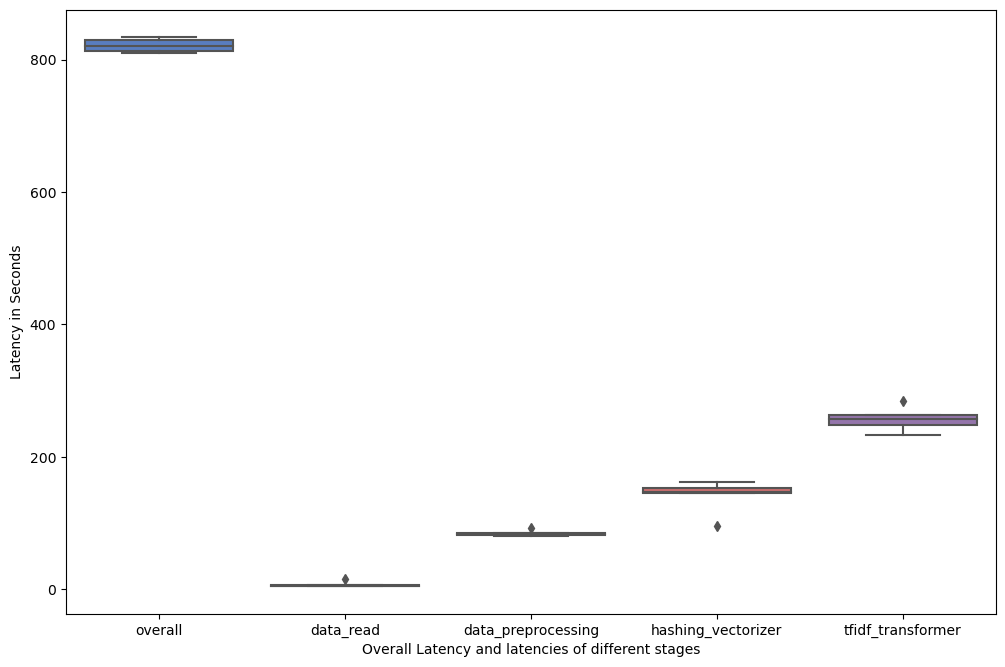

Unnamed: 0                     overall                  data_read  \
                mean       std count        mean        std count      mean   
n_workers                                                                     
1                  2  1.581139     5  821.346881  10.271341     5  7.323997   

                          hashing_vectorizer  ... data_preprocessing  \
                std count               mean  ...              count   
n_workers                                     ...                      
1          4.444873     5         140.562517  ...                  5   

              nrows            tfidf_transformer                 sample_run  \
               mean  std count              mean       std count       mean   
n_workers                                                                     
1          20725971  0.0     5        257.355478  19.28817     5          2   

                           
                std count  
n_workers                  
1          1.581139     5  

[1 rows x 27 columns]

In [4]:
data_spark_persist, melt_data_spark_persist = visualize_data_spark_adjusted("./results/result_poc_nlp_spark_Books_persist.csv")
groupy_spark_persist = data_spark_persist.groupby("n_workers").agg(['mean', 'std', 'count'])
groupy_spark_persist

In [5]:
data_spark_persist

,Unnamed: 0,overall,data_read,hashing_vectorizer,tfid_transformer,data_preprocessing,nrows,tfidf_transformer,n_workers,sample_run
0,0,813.567749,15.239853,95.383197,0,92.254896,20725971,285.076923,1,0
1,1,809.337088,5.969576,147.581391,0,80.536814,20725971,248.685240,1,1
2,2,833.992703,4.935677,153.299537,0,83.471319,20725971,257.236600,1,2
3,3,828.907353,5.483240,144.962025,0,84.636143,20725971,263.141393,1,3
4,4,820.929514,4.991638,161.586432,0,81.717434,20725971,232.637235,1,4


## Data without persist, which will give us the end to end timing in real world scenarios.

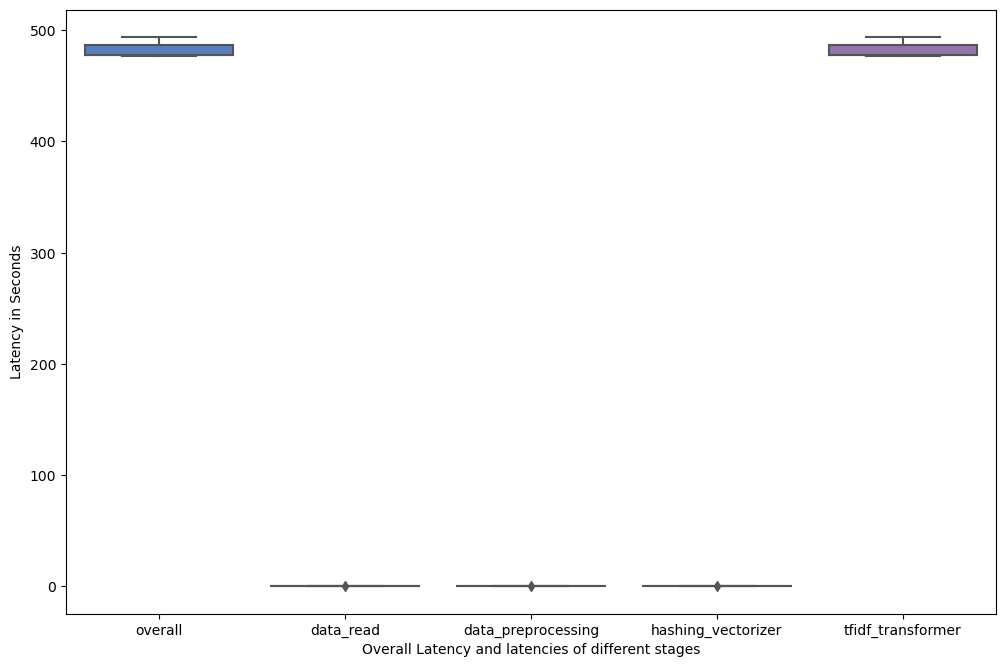

Unnamed: 0                     overall                data_read  \
                mean       std count        mean      std count      mean   
n_workers                                                                   
1                  2  1.581139     5  482.556675  7.49993     5  0.050778   

                         hashing_vectorizer  ... data_preprocessing     nrows  \
               std count               mean  ...              count      mean   
n_workers                                    ...                                
1          0.00059     5          -0.080929  ...                  5  20725971   

                     tfidf_transformer                 sample_run            \
           std count              mean       std count       mean       std   
n_workers                                                                     
1          0.0     5        482.389669  7.491129     5          2  1.581139   

                 
          count  
n_workers        
1             5  

[1 rows x 27 columns]

In [6]:
data_spark_nonpersist, melt_data_spark_nonpersist = visualize_data_spark_adjusted("./results/result_poc_nlp_spark_Books_nonpersist.csv")
groupy_spark_nonpersist = data_spark_nonpersist.groupby("n_workers").agg(['mean', 'std', 'count'])
groupy_spark_nonpersist

# Baseline Scikit-Learn Performance

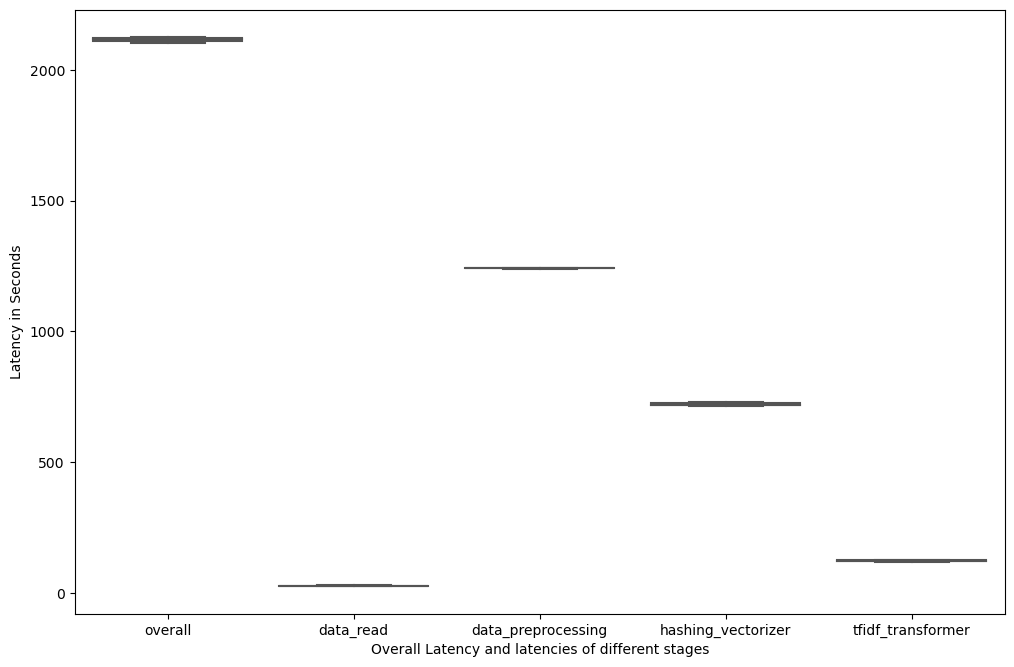

Unnamed: 0                 overall                   data_read  \
                mean  std count         mean        std count       mean   
n_workers                                                                  
1                  1  1.0     3  2115.233674  11.366341     3  27.855721   

                          hashing_vectorizer  ... data_preprocessing  \
                std count               mean  ...              count   
n_workers                                     ...                      
1          1.564252     3          722.18887  ...                  3   

              nrows            tfidf_transformer                 sample_run  \
               mean  std count              mean       std count       mean   
n_workers                                                                     
1          20725971  0.0     3        123.780726  3.381532     3          1   

                      
           std count  
n_workers             
1          1.0     3  

[1 rows x 27 columns]

In [7]:
data_sklearn, melt_data_sklearn = visualize_data("./results/result_poc_nlp_sklearn_Books.csv") # we can use the cuML visualized function since all captured fields are same
groupy_sklearn = data_sklearn.groupby("n_workers").agg(['mean', 'std', 'count'])
groupy_sklearn

In [8]:
groupy_sklearn

Unnamed: 0                 overall                   data_read  \
                mean  std count         mean        std count       mean   
n_workers                                                                  
1                  1  1.0     3  2115.233674  11.366341     3  27.855721   

                          hashing_vectorizer  ... data_preprocessing  \
                std count               mean  ...              count   
n_workers                                     ...                      
1          1.564252     3          722.18887  ...                  3   

              nrows            tfidf_transformer                 sample_run  \
               mean  std count              mean       std count       mean   
n_workers                                                                     
1          20725971  0.0     3        123.780726  3.381532     3          1   

                      
           std count  
n_workers             
1          1.0     3  

[1 rows x 27 columns]

# Comparison of End to End times

## Calculations for the graph

In [9]:
melt_data_cuML["Experiment_Class"]="cuML + Dask"
melt_data_sklearn["Experiment_Class"] = "Scikit-Learn"
melt_data_spark_persist["Experiment_Class"]="Apache Spark"
melt_data_spark_nonpersist["Experiment_Class"] = "Apache Spark"
melt_data_spark_persist[melt_data_spark_persist.latency=="overall"] = melt_data_spark_nonpersist[melt_data_spark_nonpersist.latency=="overall"]
data = pd.concat([melt_data_sklearn, melt_data_spark_persist, melt_data_cuML[melt_data_cuML.n_workers==6]])

## Plot the latencies.

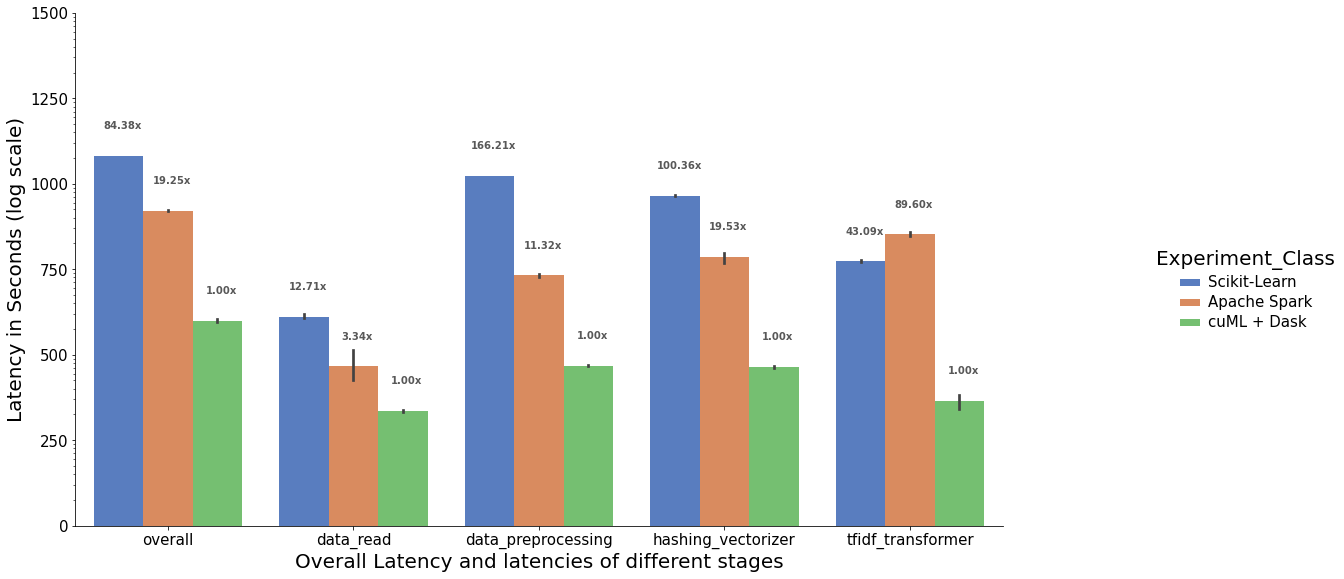

In [10]:
# with some help from https://stackoverflow.com/a/31754317
g = sns.catplot(x='latency', y='value', hue='Experiment_Class', data=data, kind='bar')
bar_order = product(["Scikit-Learn", "Apache Spark", "cuML + Dask"], ["overall", "data_read", "data_preprocessing", "hashing_vectorizer", "tfidf_transformer"], )
spots = zip(g.ax.patches, bar_order)
for spot in spots:
    corresponding_cuml_numbers = data[(data.Experiment_Class=="cuML + Dask") & (data.latency==spot[1][1])]
    mean_std = corresponding_cuml_numbers.value.mean()# + corresponding_cuml_numbers.value.std() 
    g.ax.annotate(f"{spot[0].get_height()/mean_std:.2f}x", (spot[0].get_x() + spot[0].get_width() / 2., spot[0].get_height()), ha='center', va='center', xytext=(4, 30), textcoords='offset points', fontsize=10, weight='bold', color="#585858")
g.fig.set_size_inches(20,8)
g.set(yscale="log")
g.set_xlabels("Overall Latency and latencies of different stages",fontsize=20)
g.set_ylabels("Latency in Seconds (log scale)",fontsize=20)
plt.setp(g._legend.get_title(), fontsize=20)
plt.setp(g._legend.texts, size=15)
g.set_xticklabels(size=15)
g.set_yticklabels(size=15)